In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/akay6483/mmml-ecommerce/main/dataset/E-commerce%20Customer%20Behavior%20-%20Sheet1.csv"
df = pd.read_csv(url)

df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
# Convert categorical values
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df['Satisfaction Level'] = df['Satisfaction Level'].map({
    'Low': 0,
    'Neutral': 1,
    'Medium': 2,
    'High': 3
})

# Target Variable
y = df['Total Spend']

# Feature Matrix (removed Membership Type, City etc.)
X = df[['Age',
        'Gender',
        'Items Purchased',
        'Average Rating',
        'Discount Applied',
        'Days Since Last Purchase',
        'Satisfaction Level']]

In [4]:
# Convert all feature values to numeric and handle errors
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Fill NaNs using median
X = X.fillna(X.median())
y = y.fillna(y.median())

print("Missing X values:", X.isnull().sum())
print("Missing y values:", y.isnull().sum())

Missing X values: Age                         0
Gender                      0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64
Missing y values: 0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (280, 7)
Testing samples: (70, 7)


In [6]:
ridge_model = Ridge(alpha=1.0)   # alpha = regularization strength
ridge_model.fit(X_train, y_train)

print("Ridge Regression model training complete!")

Ridge Regression model training complete!


In [7]:
ridge_pred = ridge_model.predict(X_test)

ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2  = r2_score(y_test, ridge_pred)

print("Ridge Regression Evaluation:")
print("MAE:", ridge_mae)
print("MSE:", ridge_mse)
print("R² Score:", ridge_r2)

Ridge Regression Evaluation:
MAE: 37.90953319823971
MSE: 2124.654766540312
R² Score: 0.9842870348636173


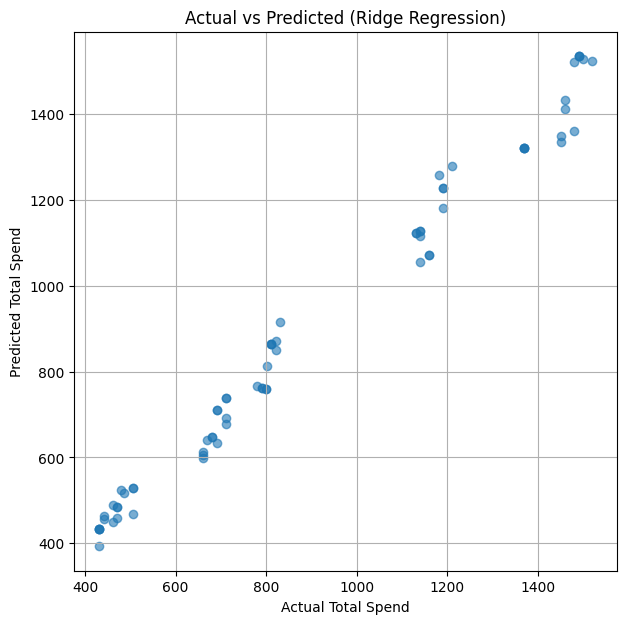

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, ridge_pred, alpha=0.6)
plt.xlabel("Actual Total Spend")
plt.ylabel("Predicted Total Spend")
plt.title("Actual vs Predicted (Ridge Regression)")
plt.grid(True)
plt.show()